# TIME SERIES ANALYSIS OF CANADA'S UNEMPLOYMENT RATE, CONSUMER PRICE INDEX AND GDP GROWTH RATE.


## Importing Libraries

In [1]:
# Importing Libraries for ARIMA model
from pmdarima import auto_arima, ARIMA, model_selection

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Importing Important Library
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## Time Series packages
#Scale differnt columns to 0-1 range
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.tsaplots import month_plot, quarter_plot

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For simple exponential smoothing 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Importing Augmented Dickey-Fuller 
from statsmodels.tsa.stattools import adfuller


## Preparing Data

### Loading Data

In [4]:
df = pd.read_csv('/Users/kblar/Library/Mobile Documents/com~apple~CloudDocs/Onedrive Desktop/Luke_Python/Python_Project/Time_Series/canada economic indicators/u-rate Canada.csv')

### Data PreProcessing

In [5]:
df

,Labour force characteristics,01-Jan,01-Feb,01-Mar,01-Apr,01-May,01-Jun,01-Jul,01-Aug,01-Sep,...,24-Jul,24-Aug,24-Sep,24-Oct,24-Nov,24-Dec,25-Jan,25-Feb,25-Mar,25-Apr
0,Unemployment 15,"1,100.10","1,120.50","1,144.60","1,144.70","1,130.60","1,162.60","1,137.70","1,163.90","1,158.70",...,"1,425.30","1,478.30","1,458.30","1,476.30","1,540.60","1,505.50","1,490.60","1,472.70","1,508.80","1,548.10"
1,Unemployment rate 16,6.9,7,7.1,7.1,7,7.2,7.1,7.2,7.2,...,6.4,6.7,6.6,6.6,6.9,6.7,6.6,6.6,6.7,6.9
2,CPI,96.8,96.9,97.1,97.8,98.4,98.4,98.1,98.2,98.4,...,161.2,161.3,161.3,161.7,162,162.3,162.6,163.6,163.5,163.1


In [6]:
# Transposing the Dataset
df = df.T

In [7]:
df.reset_index(inplace= True)

In [8]:
df

,index,0,1,2
0,Labour force characteristics,Unemployment 15,Unemployment rate 16,CPI
1,01-Jan,"1,100.10",6.9,96.8
2,01-Feb,"1,120.50",7,96.9
3,01-Mar,"1,144.60",7.1,97.1
4,01-Apr,"1,144.70",7.1,97.8
...,...,...,...,...
288,24-Dec,"1,505.50",6.7,162.3
289,25-Jan,"1,490.60",6.6,162.6
290,25-Feb,"1,472.70",6.6,163.6
291,25-Mar,"1,508.80",6.7,163.5


In [9]:
df.columns = ['date', 'u', 'u-rate', 'cpi']

In [10]:
df

,date,u,u-rate,cpi
0,Labour force characteristics,Unemployment 15,Unemployment rate 16,CPI
1,01-Jan,"1,100.10",6.9,96.8
2,01-Feb,"1,120.50",7,96.9
3,01-Mar,"1,144.60",7.1,97.1
4,01-Apr,"1,144.70",7.1,97.8
...,...,...,...,...
288,24-Dec,"1,505.50",6.7,162.3
289,25-Jan,"1,490.60",6.6,162.6
290,25-Feb,"1,472.70",6.6,163.6
291,25-Mar,"1,508.80",6.7,163.5


In [11]:
df = df.drop(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 1 to 292
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    292 non-null    object
 1   u       292 non-null    object
 2   u-rate  292 non-null    object
 3   cpi     292 non-null    object
dtypes: object(4)
memory usage: 9.3+ KB


In [13]:
# Changing the format of the data and setting the date as index

df['u'] = pd.to_numeric(df['u'].str.replace(',', ''))

df['u-rate'] = pd.to_numeric(df['u-rate'])

df['cpi'] = pd.to_numeric(df['cpi'])

df['date'] = pd.to_datetime(df['date'], format='%y-%b')
df.set_index('date', inplace = True) #setting the date as index

In [14]:
#Setting the frequency of the data
df = df.asfreq('MS')

In [15]:
# Transforming the monthly data to quaterly data
df_q = df.resample('QE').last()

In [16]:
df_q.drop('2025-06-30 00:00:00')

,u,u-rate,cpi
date,,,
2001-03-31,1144.6,7.1,97.1
2001-06-30,1162.6,7.2,98.4
2001-09-30,1158.7,7.2,98.4
2001-12-31,1310.4,8.1,97.7
2002-03-31,1291.7,7.9,98.8
...,...,...,...
2024-03-31,1342.3,6.1,159.9
2024-06-30,1424.5,6.4,160.7
2024-09-30,1458.3,6.6,161.3


In [17]:
# Exporting Transformed data

df.to_csv('urate_cpi_transformed.csv', index=True)

In [18]:
df_q.drop(['u'], axis= 1, inplace= True) ## Droping number of unemployed variable as it will not be needed in this analysis

### Transforming GDP data

In [19]:
df_gdp = pd.read_csv('/Users/kblar/Library/Mobile Documents/com~apple~CloudDocs/Onedrive Desktop/Luke_Python/Python_Project/Time_Series/canada economic indicators/GDP Canada.csv')

In [20]:
df_gdp

,Estimates,Q1 2001,Q2 2001,Q3 2001,Q4 2001,Q1 2002,Q2 2002,Q3 2002,Q4 2002,Q1 2003,...,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023,Q1 2024,Q2 2024,Q3 2024,Q4 2024,Q1 2025
0,Gross domestic product at market prices,0.6,0.3,-0.1,0.6,1.5,0.6,0.9,0.5,0.6,...,-0.1,1,0.2,-0.1,0.2,0.5,0.6,0.6,0.5,0.5


In [21]:
# Transposing the Dataset
df_gdp = df_gdp.T.reset_index()

In [22]:
df_gdp.columns = ['date', 'gdp_growth'] # Creating column names for the GDP dataset

In [23]:
df_gdp = df_gdp.drop(0).reset_index(drop = True)

In [24]:
df_gdp['gdp_growth'] = pd.to_numeric(df_gdp['gdp_growth'])

In [25]:
# Convert 'Q1 2001' to '2001Q1' for parsing
df_gdp['date'] = df_gdp['date'].str.replace(r'(Q\d)\s(\d{4})', r'\2\1', regex=True)
df_gdp['date'] = pd.PeriodIndex(df_gdp['date'], freq='Q-DEC').to_timestamp()

In [26]:
df_gdp.set_index('date', inplace= True)

In [27]:
df_gdp1 = df_gdp.copy()

In [28]:
df_gdp1 = df_gdp1.resample('QE').mean()

In [ ]:
df_gdp1.to_csv('gdp_canada_transformed.csv', index= True) # Saving transformed data set

### Merge the unemployment data and the GDP data


In [29]:
df_main = pd.merge(df_q, df_gdp1, on= 'date', how = 'inner') ## main dataset merging all the required variables

In [30]:
df_main

,u-rate,cpi,gdp_growth
date,,,
2001-03-31,7.1,97.1,0.6
2001-06-30,7.2,98.4,0.3
2001-09-30,7.2,98.4,-0.1
2001-12-31,8.1,97.7,0.6
2002-03-31,7.9,98.8,1.5
...,...,...,...
2024-03-31,6.1,159.9,0.5
2024-06-30,6.4,160.7,0.6
2024-09-30,6.6,161.3,0.6


In [ ]:
df_main.to_csv('canada economic indicators.csv', index=True) # Saving merged dataset

## Exploratory Data Analysis

### Plotting the Data

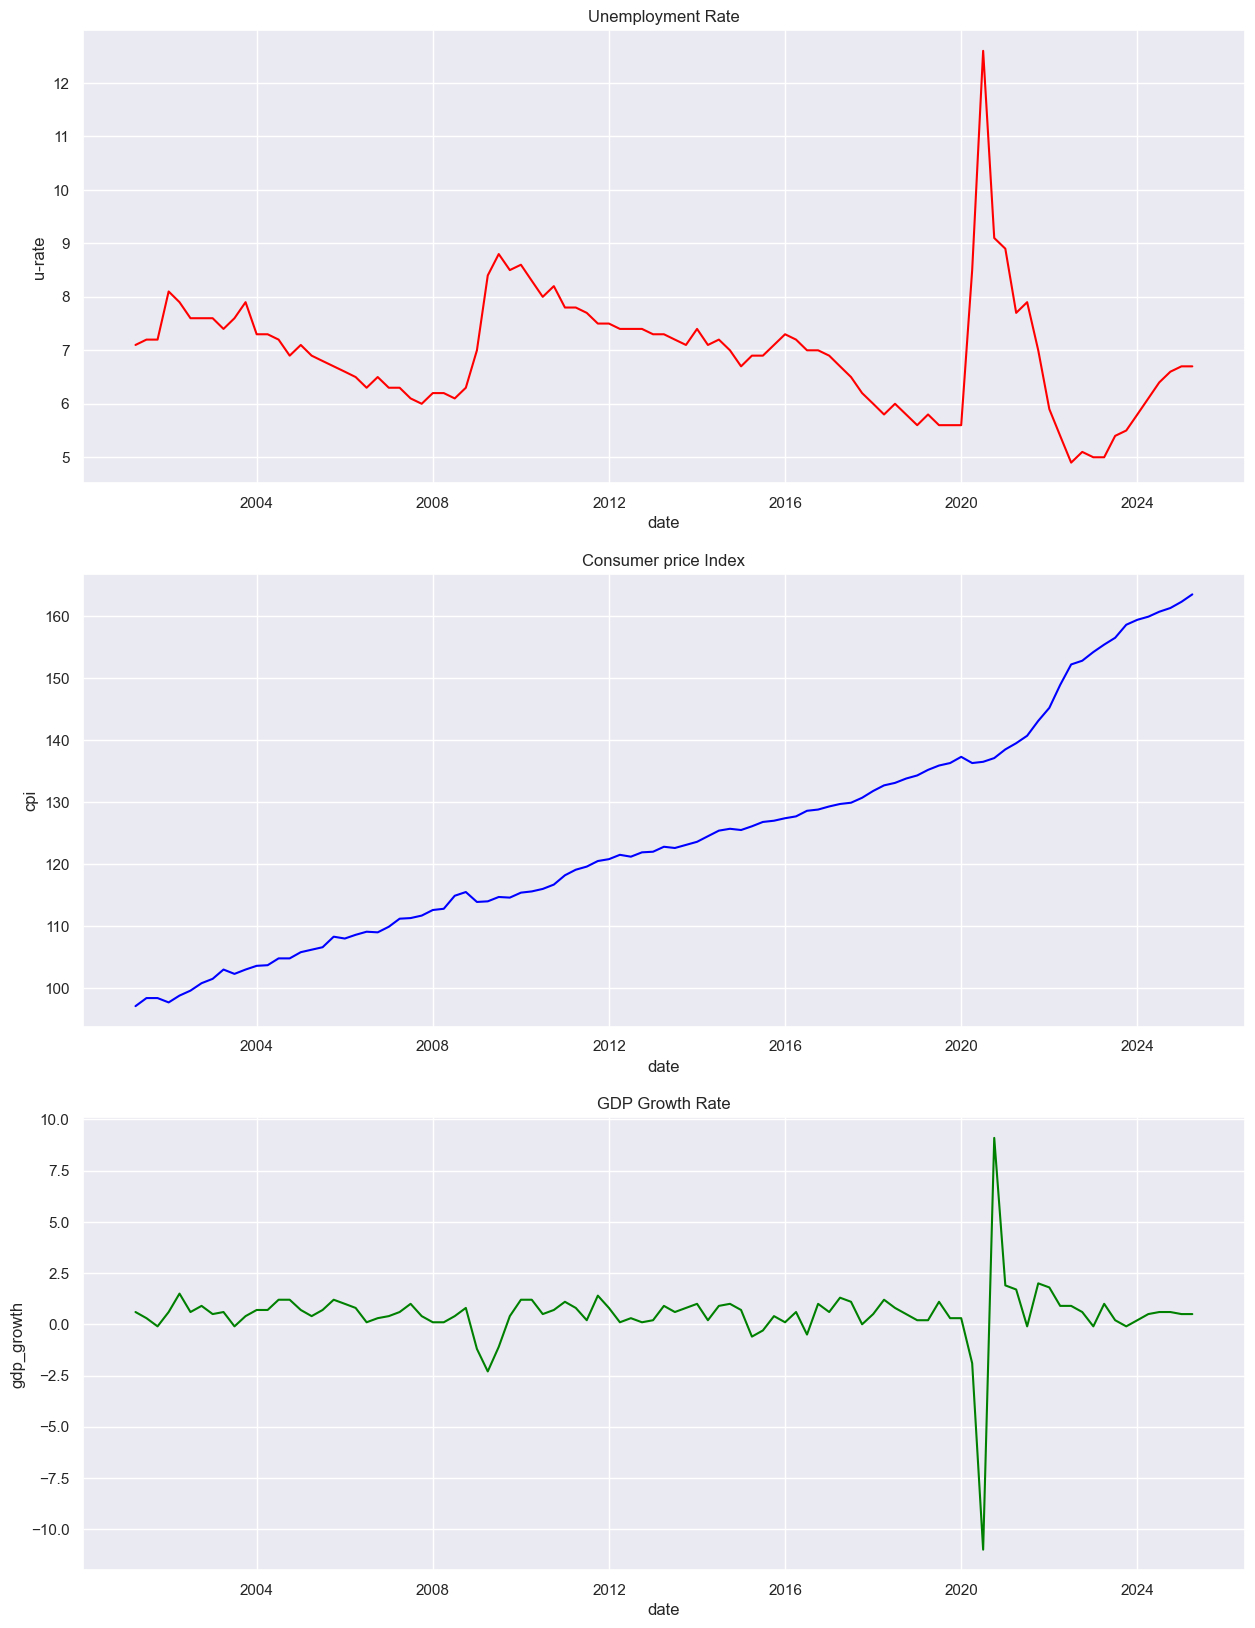

In [249]:
# Plotting the unemployment rate, CPI and GDP growth rate


fig, ax = plt.subplots(3, 1, figsize = (15,20))

#Seaborn plot on individual subplots
sns.lineplot(data = df_main, x = 'date', y = 'u-rate', ax = ax[0], color = 'red')
ax[0].set_title('Unemployment Rate')

sns.lineplot(data = df_main, x = 'date', y = 'cpi', ax = ax[1], color = 'blue')
ax[1].set_title('Consumer price Index')

sns.lineplot(data = df_main, x = 'date', y = 'gdp_growth', ax = ax[2], color = 'green')
ax[2].set_title('GDP Growth Rate')

#plt.tight_layout
plt.show()

#### Observation

- The unemployment rate and GDP growth rate appear to be stationary; however, additional tests will be conducted to confirm their stationarity.
- CThe Consumer Price Index (CPI) shows an upward trend, indicating non-stationarity. Nonetheless, further tests will be performed to verify this.

### Plotting Quarterly Seasonality

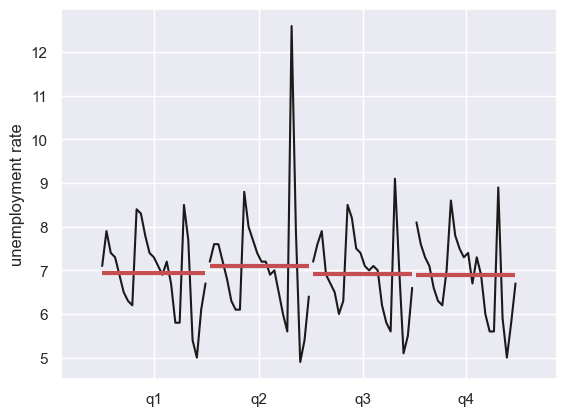

In [360]:
# Plotting Quarterly Seasonality

quarter_plot(df_main['u-rate'], ylabel='unemployment rate')

plt.show()

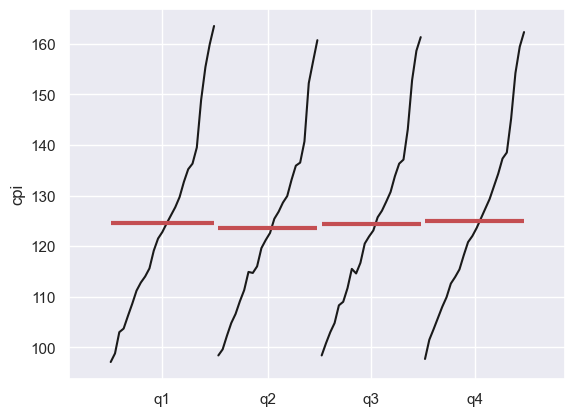

In [361]:
quarter_plot(df_main['cpi'], ylabel='cpi')

plt.show()

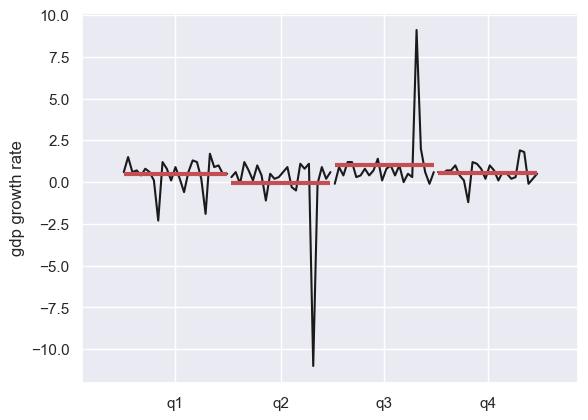

In [362]:
quarter_plot(df_main['gdp_growth'], ylabel='gdp growth rate')

plt.show()

#### Observation

- All three plots show no evidence of quarterly seasonality in the variables, as the datasets have already been seasonally adjusted.

### Seasonal Decomposition Plot 

In [33]:
# Seasonal Decomposition Plot 

def decomp (variable, trend):
    decomposition = seasonal_decompose(df_main[variable],
                                       model = trend,
                                       period = 4)
    fig = decomposition.plot()
    fig.set_size_inches(10,8)
    plt.show()


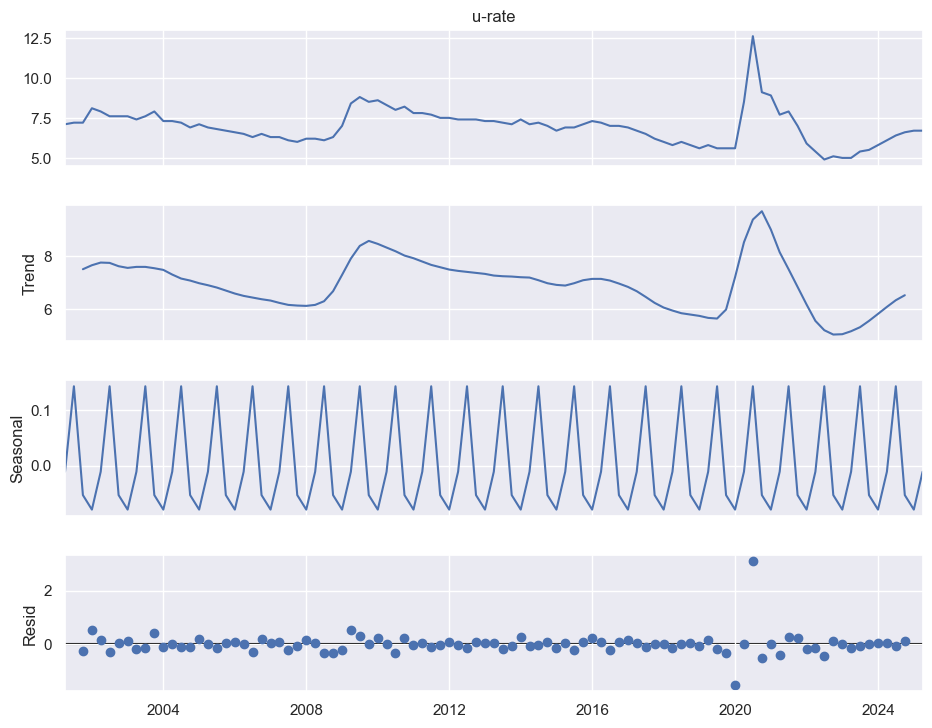

In [34]:
# Plot for unemployment rate
decomp('u-rate', 'additive')

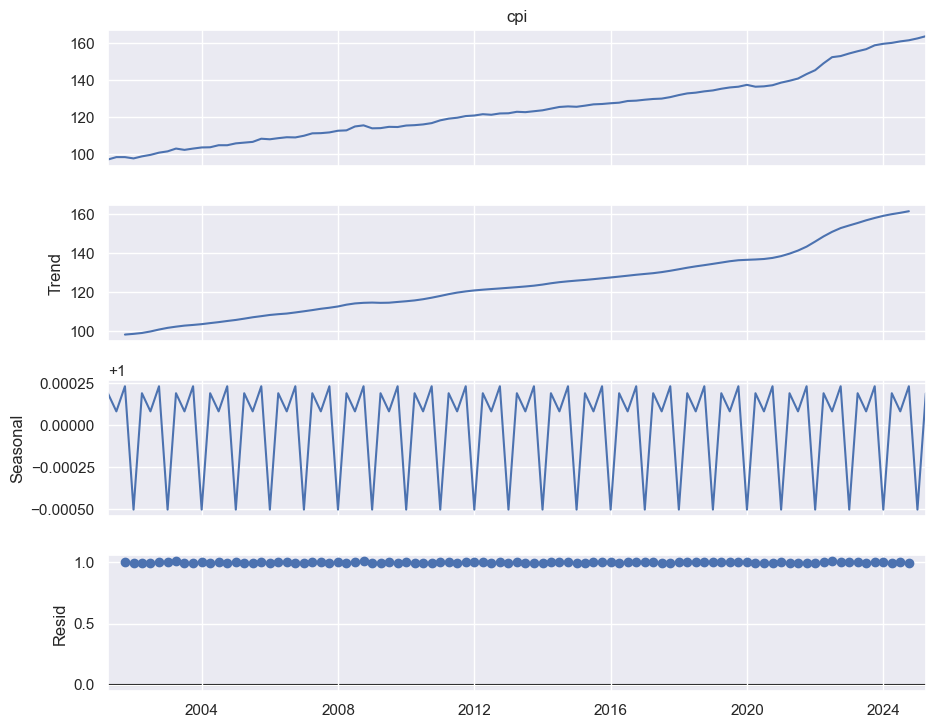

In [ ]:
# Plot for Consumer Price
decomp('cpi', 'multiplicative')

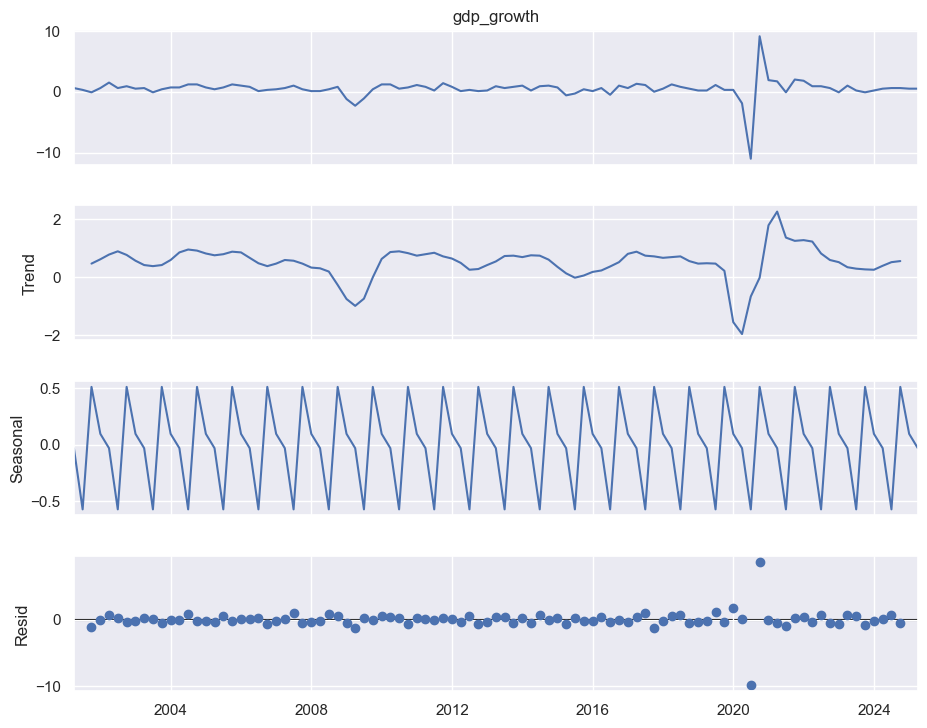

In [36]:
# Plot for GDP growth rate
decomp('gdp_growth', 'additive')

#### Observation

- The unemployment rate and GDP growth rate exhibit no trend or seasonality, whereas the CPI displays an upward trend.
- The residuals for all three variables appear to be randomly distributed around their means.

### Autocorrelation and Partial Autocorrelation Functions

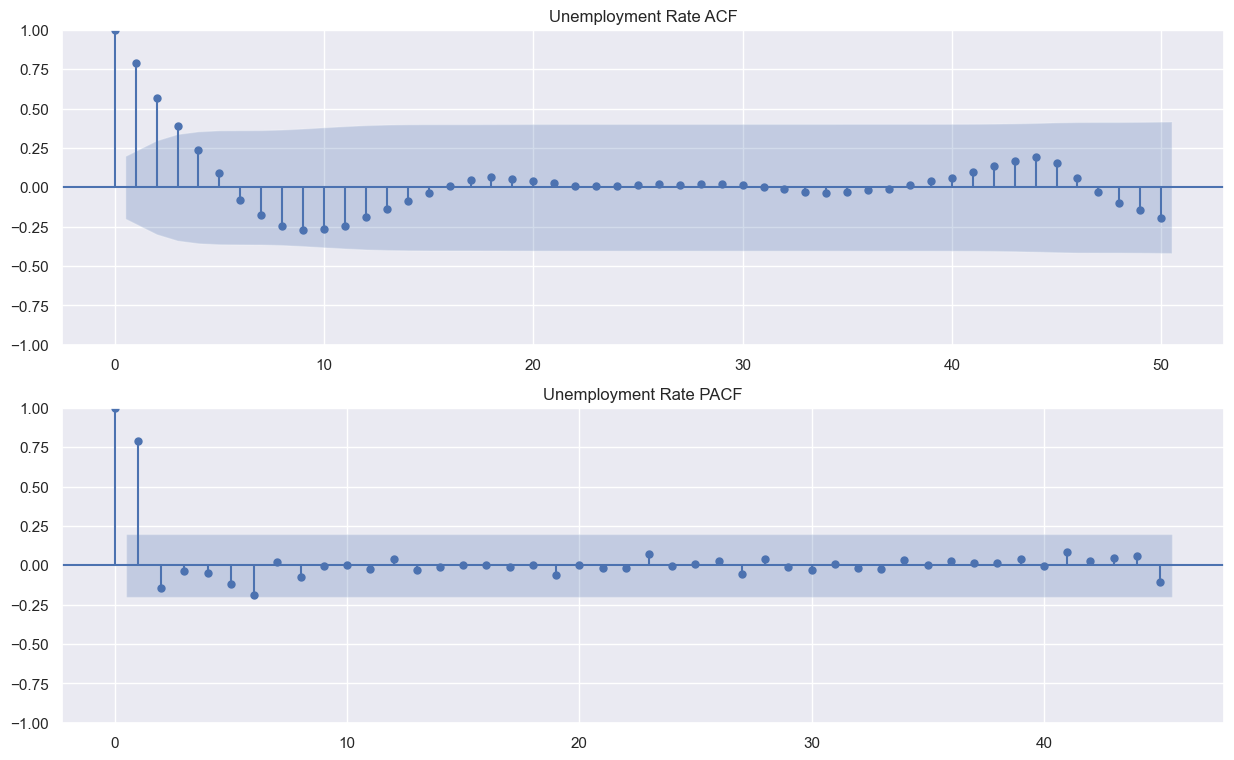

In [38]:
fig, ax = plt.subplots(2, 1, figsize = (15,9))
plot_acf(df_main['u-rate'], lags = 50, ax = ax[0])
ax[0].set_title('Unemployment Rate ACF')

plot_pacf(df_main['u-rate'], lags = 45, ax = ax[1])
ax[1].set_title('Unemployment Rate PACF')
plt.show()

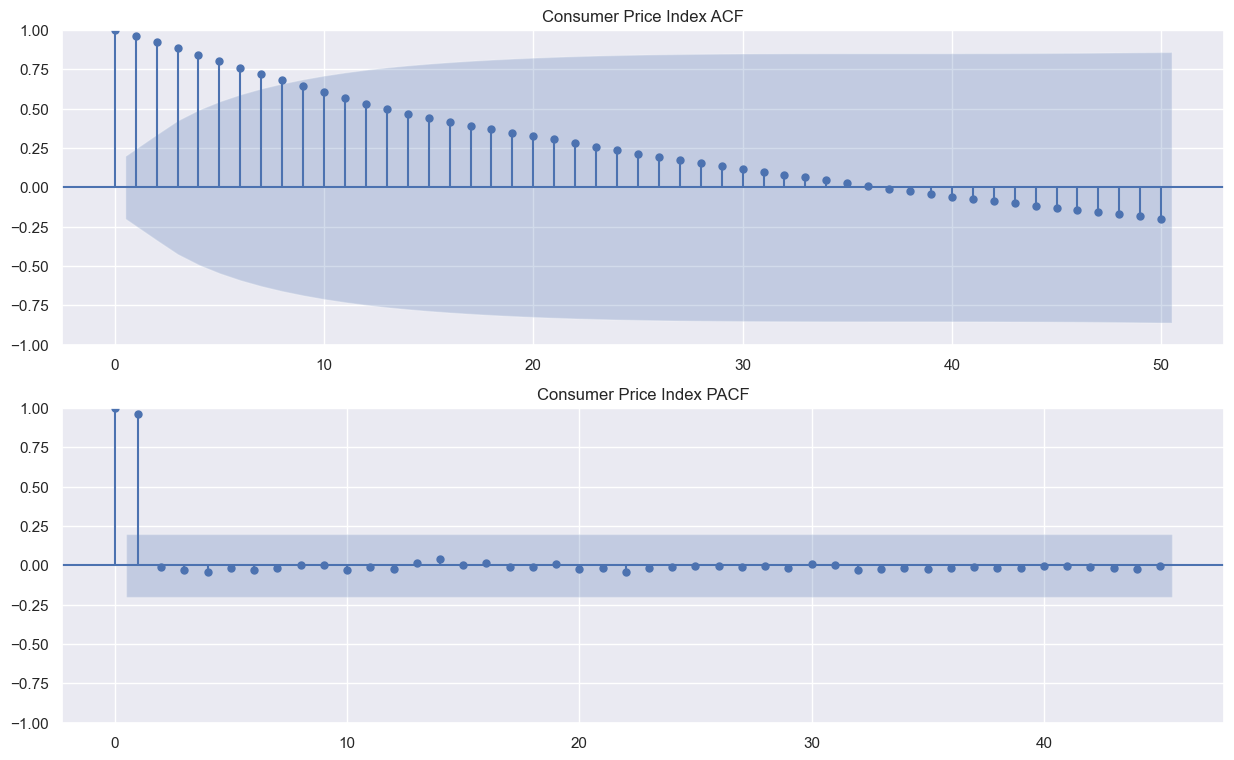

In [247]:
fig, ax = plt.subplots(2, 1, figsize = (15,9))
plot_acf(df_main['cpi'], lags = 50, ax = ax[0])
ax[0].set_title('Consumer Price Index ACF')

plot_pacf(df_main['cpi'], lags = 45, ax = ax[1])
ax[1].set_title('Consumer Price Index PACF')
plt.show()

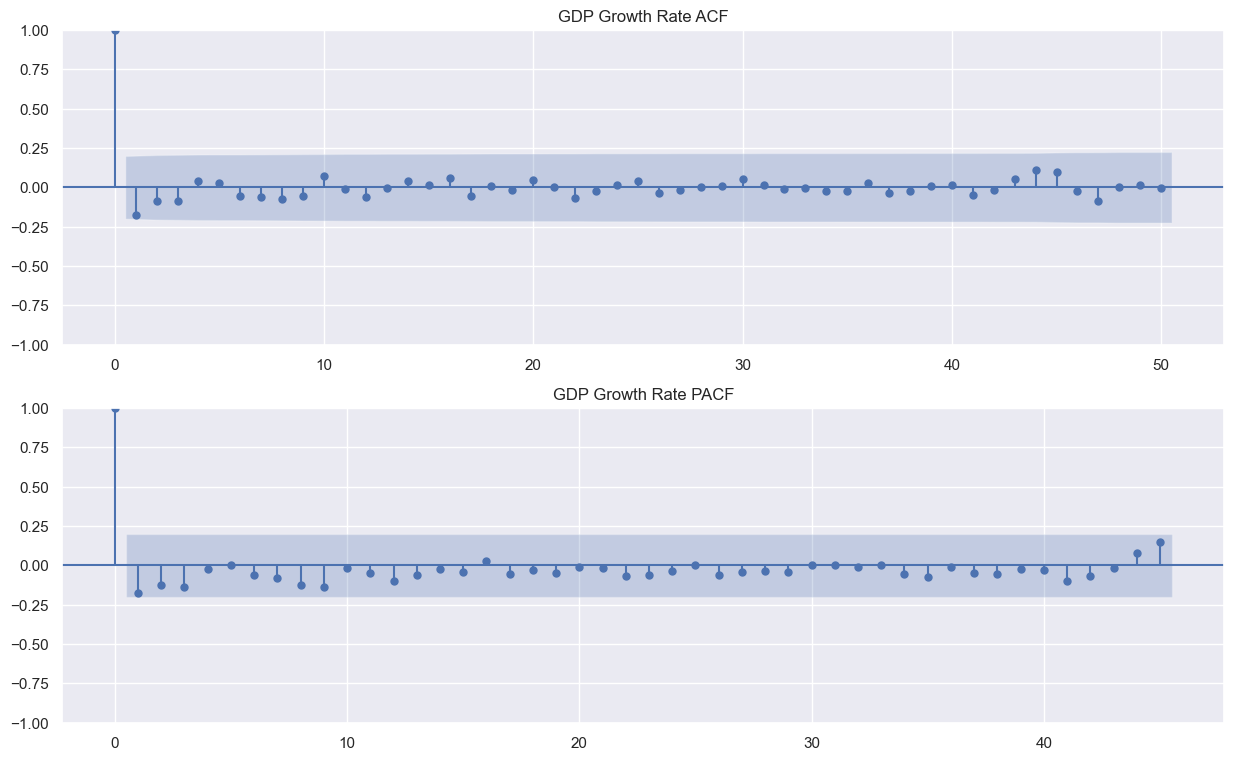

In [248]:
fig, ax = plt.subplots(2, 1, figsize = (15,9))
plot_acf(df_main['gdp_growth'], lags = 50, ax = ax[0])
ax[0].set_title('GDP Growth Rate ACF')

plot_pacf(df_main['gdp_growth'], lags = 45, ax = ax[1])
ax[1].set_title('GDP Growth Rate PACF')
plt.show()

#### Observation

- **Unemployment Rate** : The ACF plot drop within the confidence band and neear zero after lag 3, suggesting the series is stationary and may have little autocorrelation. The PACF has a significant spike at lag 1 and drops off. This suggests the current value depends mostly on the previous value.

- **CPI** : The ACF plot decays slowly, suggesting non-stationarity. This matches the earlier observation that CPI is trending upwards. The PACF plot has a significant spike at lag 1 and then drops off. This suggests the current value depends mostly on the previous value.

- **GDP Growth Rate**: The AC plot shows no spikes beyong lag 0, hence the series is stationary and has little autocorrelation. The PACF plot also shows no significant spikes. Hence suggesting that current values do not depend on past values. 

### Splitting Training and Test Data

In [86]:
# Training and Test Split

train, test = df_main.iloc[:-10, :], df_main.iloc[-10:, :]


#### Comment

The trained data set contains 87 observations and the test dateset contains 10 observations.

## Exponential Smoothing

In [146]:
#Creating a function to assess the performance of the Single, Double and Holt-Winters Exponential Smoothing
# for all three variables.

def forecast_func1(train_pred, test_pred, periods, trend, seasonal):
    
    # train_pred is the training data you want to use for your forecast
    # train_pred is the test data you will use to test the model
    # period is the seasonal period for the Holt-Winter Model
    # trend goes into both double and triple smoothing functions. It should either be 'add' or 'mul'
    # seasonal goes into the triple smoothing function. It should either be 'add' or 'mul'



    ex_smooth = [] # ex_smooth stores a list of your forecast names using the different smoothing models
    model_names = ['Simple Exponential Smoothing', 'Double Exponential Smoothing', 'Holt-Winter Smoothing']
    df_perf = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE %'])  # df_perf stores your performance matrix
     
    # 1. Simple Exponential Smoothing
    model_simple = SimpleExpSmoothing(train_pred).fit()
    predictions_simple = model_simple.forecast(len(test_pred))
    ex_smooth.append(predictions_simple)
    
    # 2. Double Exponential Smoothing
    model_double = ExponentialSmoothing(train_pred, trend= trend, seasonal=None).fit()
    predictions_double = model_double.forecast(len(test_pred))
    ex_smooth.append(predictions_double)
    
    # 3. Holt-Winter (Triple Exponential) Smoothing
    model_triple = ExponentialSmoothing(train_pred, trend= trend, seasonal= seasonal, seasonal_periods= periods).fit()
    predictions_triple = model_triple.forecast(len(test_pred))
    ex_smooth.append(predictions_triple)
    
    # 4. Calculate error metrics for each model
    for i, preds in enumerate(ex_smooth):
        mae = mean_absolute_error(test_pred, preds)
        rmse = np.sqrt(mean_squared_error(test_pred, preds))
        mape = round(mean_absolute_percentage_error(test_pred, preds)* 100, 3)
        df_perf.loc[i] = [model_names[i], mae, rmse, mape]
    
    # 5. Plotting stacked predictions
    plt.figure(figsize=(15, 5))
    
    # Plot actual test values
    plt.plot(test_pred.index, test_pred, label='Actual', color='black', linewidth=2)
    
    # Plot predictions from each model
    colors = ['blue', 'green', 'red']
    for i, preds in enumerate(ex_smooth):
        plt.plot(test_pred.index, preds, label=model_names[i], color=colors[i], linestyle='--')
    
    plt.title('Forecast Comparison')
    plt.xlabel('Date/Index')
    plt.ylabel('Forecasted Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return df_perf

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


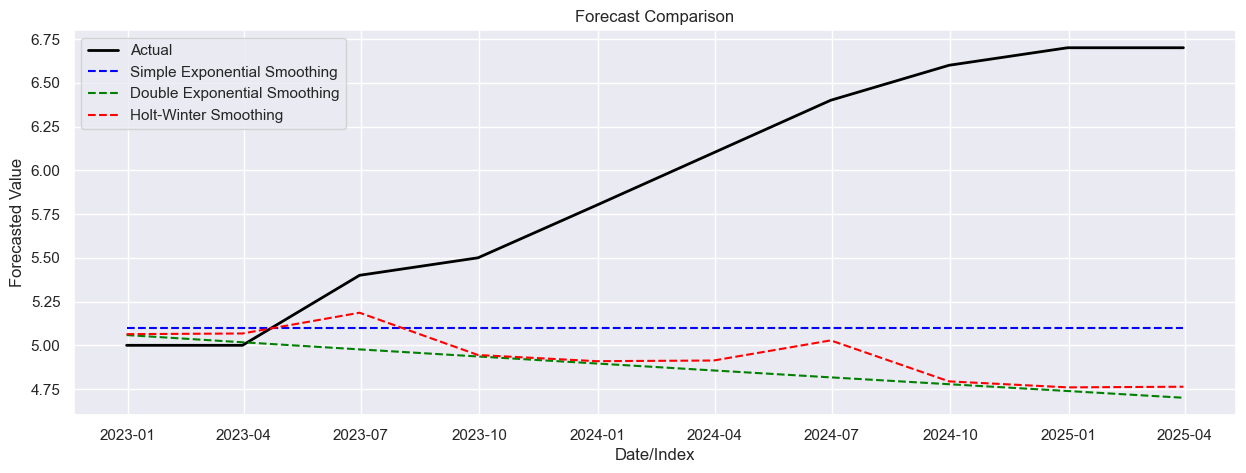

,Model,MAE,RMSE,MAPE %
0,Simple Exponential Smoothing,0.860000,1.040192,13.609
1,Double Exponential Smoothing,1.057652,1.285887,16.704
2,Holt-Winter Smoothing,1.003294,1.233848,15.816


In [148]:
forecast_func1(train['u-rate'], test['u-rate'], 4, 'mul', 'mul')

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


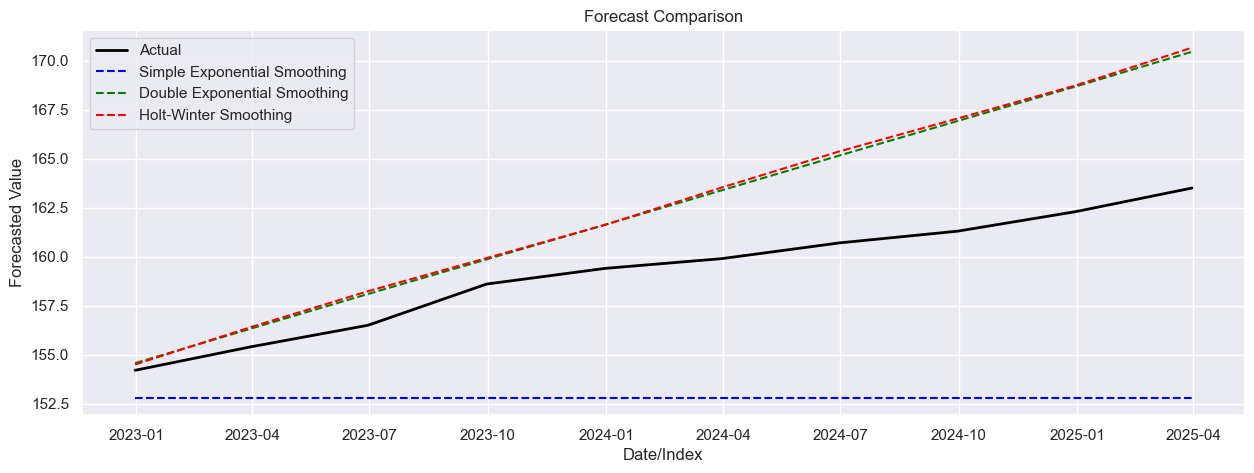

,Model,MAE,RMSE,MAPE %
0,Simple Exponential Smoothing,6.380000,6.995856,3.977
1,Double Exponential Smoothing,3.329032,4.036092,2.068
2,Holt-Winter Smoothing,3.423437,4.142201,2.127


In [154]:
forecast_func1(train['cpi'], test['cpi'], 4, 'add', 'mul')

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


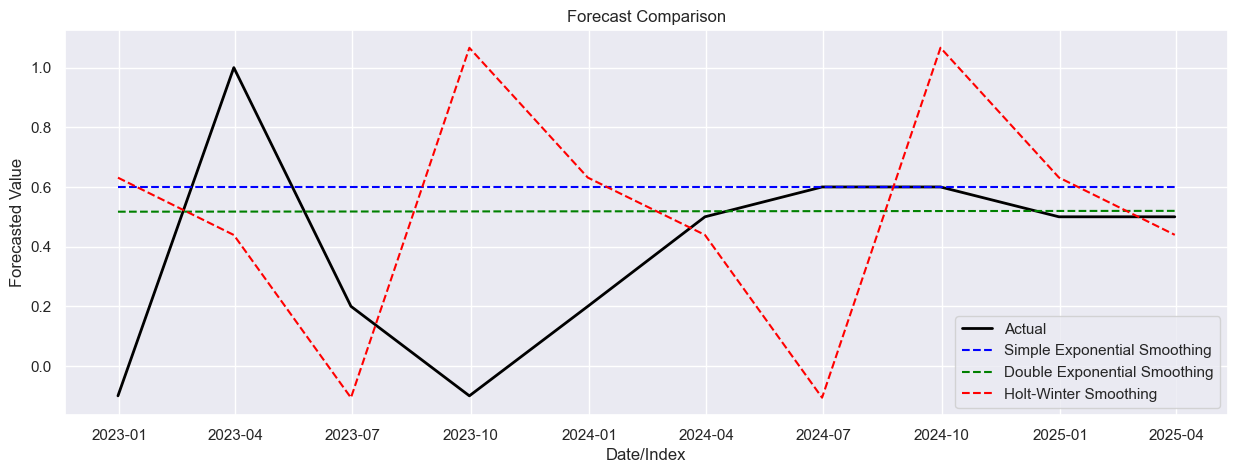

,Model,MAE,RMSE,MAPE %
0,Simple Exponential Smoothing,0.290000,0.386005,190.000
1,Double Exponential Smoothing,0.257372,0.348165,164.004
2,Holt-Winter Smoothing,0.462173,0.568377,256.846


In [158]:
forecast_func1(train['gdp_growth'], test['gdp_growth'], 4, 'add', 'add')

#### Observation

None of the three models—Single, Double, and Holt-Winters Exponential Smoothing—effectively capture the underlying patterns in the data. There is a noticeable discrepancy between the forecasted values and the actual test data.

## Preparation for ARIMA

### Testing for Stationarity with Augmented Dickey-Fuller Test

In [91]:
# Perform Augmented Dickey-Fuller test to check for stationarity

def dicfuller(value):
    result = adfuller(value)
    print('p-value: %f' %result[1])

    #Interpreting the results
    if result[1] < 0.05:
        print('Evidience suggests that then time series is stationary.')
    else:
        print('Evidence suggests that the time series is not stationary')


In [92]:
dicfuller(df_main['u-rate'])

p-value: 0.005852
Evidience suggests that then time series is stationary.


In [93]:
dicfuller(df_main['cpi'])

p-value: 1.000000
Evidence suggests that the time series is not stationary


In [94]:
dicfuller(df_main['gdp_growth'])

p-value: 0.000000
Evidience suggests that then time series is stationary.


#### Observation
The Augmented Dickey-Fuller test indicates that the unemployment rate and GDP growth rate are stationary, while the CPI is non-stationary. This finding supports the earlier observations from the plots.

### Making CPI Stationary

In [159]:
# Making the CPI data stationary
# Difference the series

df_main['cpi_diff'] = df_main['cpi'].diff().dropna()

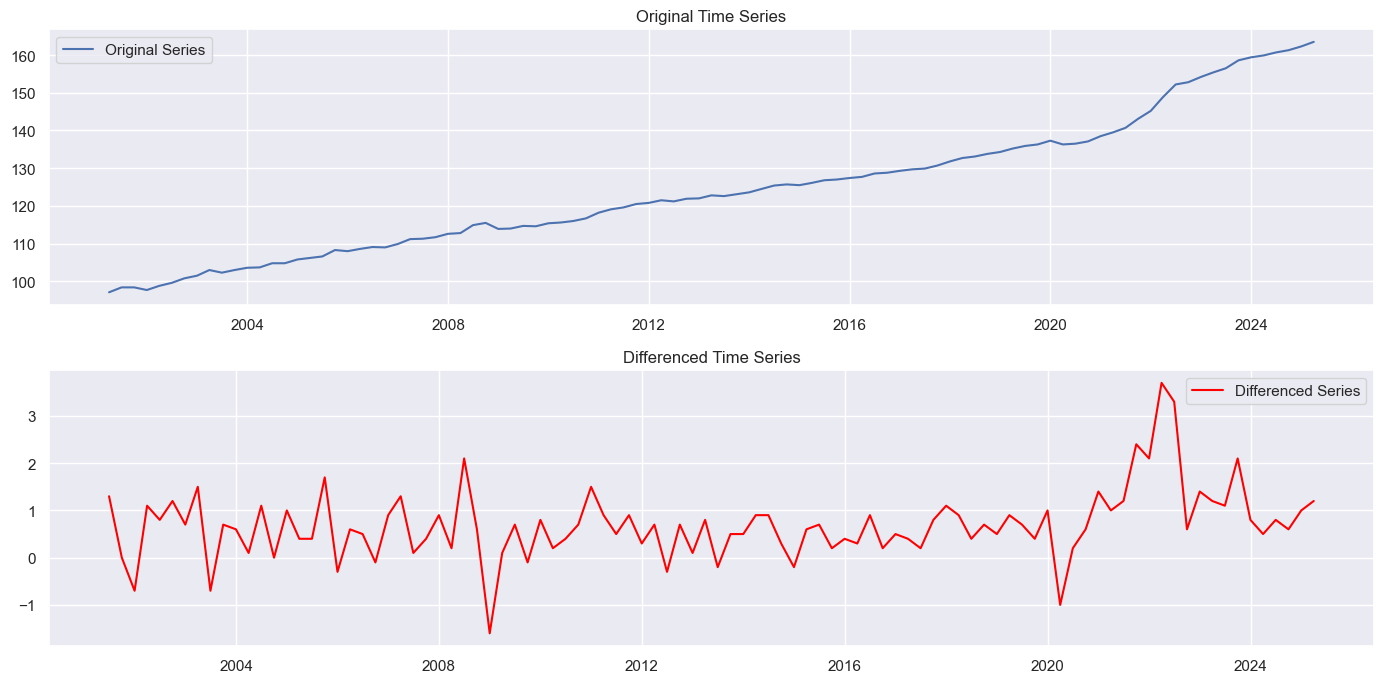

In [160]:
#Plotting the origial CPI and difference CPI
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot
plt.plot(df_main['cpi'], label = 'Original Series')
plt.title('Original Time Series')
plt.legend()

plt.subplot(2,1,2) # 2 rows, 1 column, 2nd subplot
plt.plot(df_main['cpi_diff'], label = 'Differenced Series', color = 'red')
plt.title('Differenced Time Series')
plt.legend()

plt.tight_layout()
plt.show()

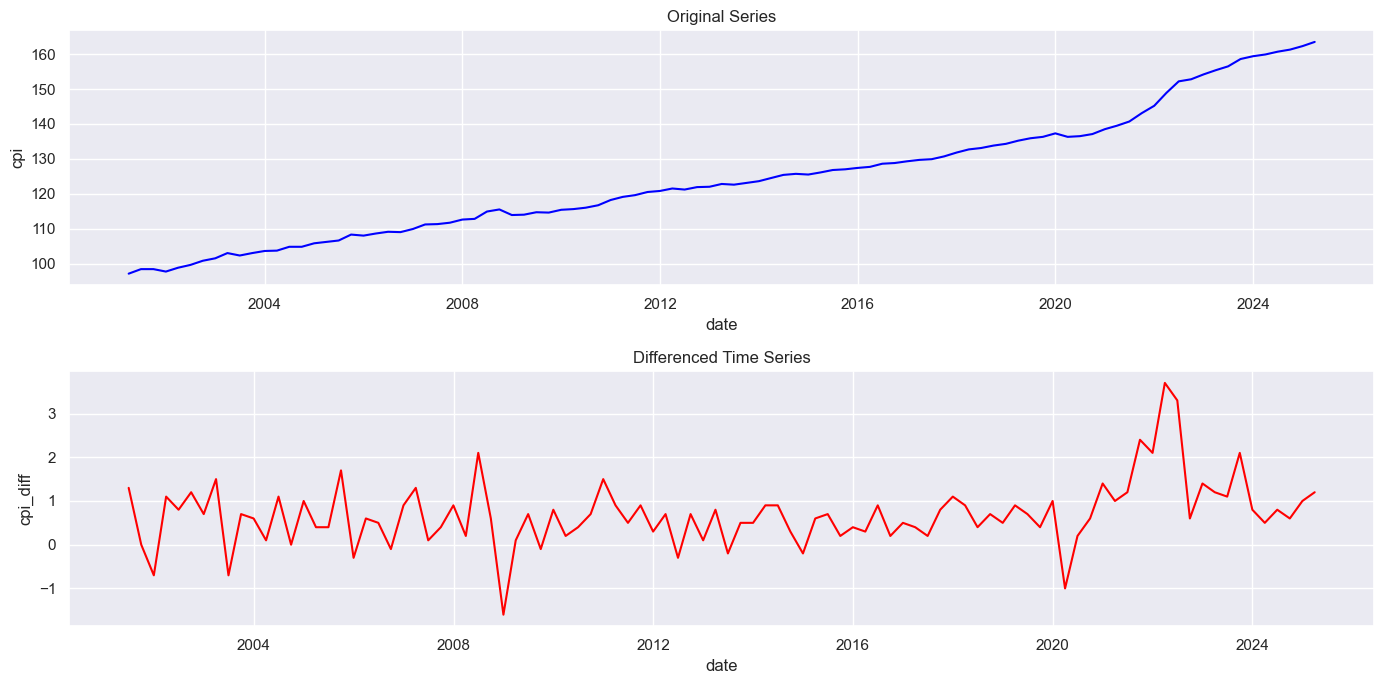

In [97]:
# Alternative Plot

fig, axs = plt.subplots(2, 1, figsize=(14, 7))

# Seaborn plots on specific axes
sns.lineplot(data = df_main, x = 'date', y = 'cpi', ax=axs[0], color = 'blue')
axs[0].set_title('Original Series')

sns.lineplot(data = df_main, x = 'date', y = 'cpi_diff', ax=axs[1], color = 'red')
axs[1].set_title('Differenced Time Series')

plt.tight_layout()
plt.show()


In [161]:
## Checking if cpi_diff is stationary

dicfuller(df_main['cpi_diff'].dropna())

p-value: 0.013866
Evidience suggests that then time series is stationary.


#### Observation 
Both the plot and the Augmented Dickey-Fuller Test confirms that the first difference of CPI is stationary.

## ARIMA Model

In [162]:
# Using ARIMA on Unemployment Rate
model_urate = auto_arima(train['u-rate'], seasonal = False)

model_urate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 -89.886
Date:                Thu, 19 Jun 2025   AIC                            189.772
Time:                        02:06:05   BIC                            202.101
Sample:                    03-31-2001   HQIC                           194.736
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6609      0.533      1.241      0.215      -0.383       1.705
ar.L1          1.6506      0.193      8.559      0.000       1.273       2.029
ar.L2         -0.7443      0.125     -5.940      0.000      -0.990      -0.499
ma.L1         -0.8418      0.224     -3.755      0.000      -1.281      -0.402
sigma2         0.4577      0.040     11.396      0.000       0.379       0.536
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               827.96
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              12.34   Skew:                             1.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# PRIDICTIONS of unemployment rate from the ARIMA model

urate_predictions_arima = model_urate.predict(n_periods= len(test))

urate_predictions_arima

2022-12-31    5.599621
2023-03-31    6.107754
2023-06-30    6.574613
2023-09-30    6.967009
2023-12-31    7.267219
2024-03-31    7.470690
2024-06-30    7.583097
2024-09-30    7.617196
2024-12-31    7.589818
2025-03-31    7.519250
Freq: QE-DEC, dtype: float64

In [164]:
# Using ARIMA on CPI

model_cpi = auto_arima(train['cpi'], seasonal = False)

model_cpi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -95.207
Date:                Thu, 19 Jun 2025   AIC                            196.414
Time:                        02:09:11   BIC                            203.777
Sample:                    03-31-2001   HQIC                           199.377
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4710      0.131      3.603      0.000       0.215       0.727
ar.L1          0.2757      0.089      3.086      0.002       0.101       0.451
sigma2         0.5354      0.065      8.242      0.000       0.408       0.663
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                17.69
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.27
Prob(H) (two-sided):                  0.54   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
# PRIDICTIONS of CPI from the ARIMA model

cpi_predictions_arima = model_cpi.predict(n_periods= len(test))

cpi_predictions_arima

2022-12-31    153.436444
2023-03-31    154.082936
2023-06-30    154.732197
2023-09-30    155.382222
2023-12-31    156.032458
2024-03-31    156.682752
2024-06-30    157.333062
2024-09-30    157.983376
2024-12-31    158.633691
2025-03-31    159.284007
Freq: QE-DEC, dtype: float64

In [166]:
# Using ARIMA on GDP Growth Rate

model_gdp = auto_arima(train['gdp_growth'], seasonal = False)

model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -167.138
Date:                Thu, 19 Jun 2025   AIC                            340.277
Time:                        02:10:07   BIC                            347.674
Sample:                    03-31-2001   HQIC                           343.255
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5027      0.269      1.866      0.062      -0.025       1.031
ma.L1         -0.2408      0.050     -4.848      0.000      -0.338      -0.143
sigma2         2.7283      0.159     17.194      0.000       2.417       3.039
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              3973.31
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              34.98   Skew:                            -4.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
# RIDICTIONS of GDP Growth Rate from the ARIMA model

gdp_predictions_arima = model_gdp.predict(n_periods= len(test))

gdp_predictions_arima

2022-12-31    0.445194
2023-03-31    0.502725
2023-06-30    0.502725
2023-09-30    0.502725
2023-12-31    0.502725
2024-03-31    0.502725
2024-06-30    0.502725
2024-09-30    0.502725
2024-12-31    0.502725
2025-03-31    0.502725
Freq: QE-DEC, dtype: float64

### Model Assessment 

In [168]:
# Function to Assess Model and Visualize Output

def model_assessment(train, test, predictions, chart_title):
    plt.figure(figsize= (15,4))
    plt.plot(train, label = 'Train')
    plt.plot(test, label = 'Test', color = 'green')
    plt.plot(predictions, label = 'Forecast', color = 'red')
    plt.title(f'Train, Test and Predictions with {chart_title}')
    plt.legend()
    plt.show()

    # Calculating the MAE, RMSE, MAPE
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = mean_absolute_percentage_error(test, predictions)

    print(f'The MAE is {mae: .2f}')
    print(f'The RMSE is {rmse: .2f}')
    print(f'The MAPE is {mape * 100: .2f}%')

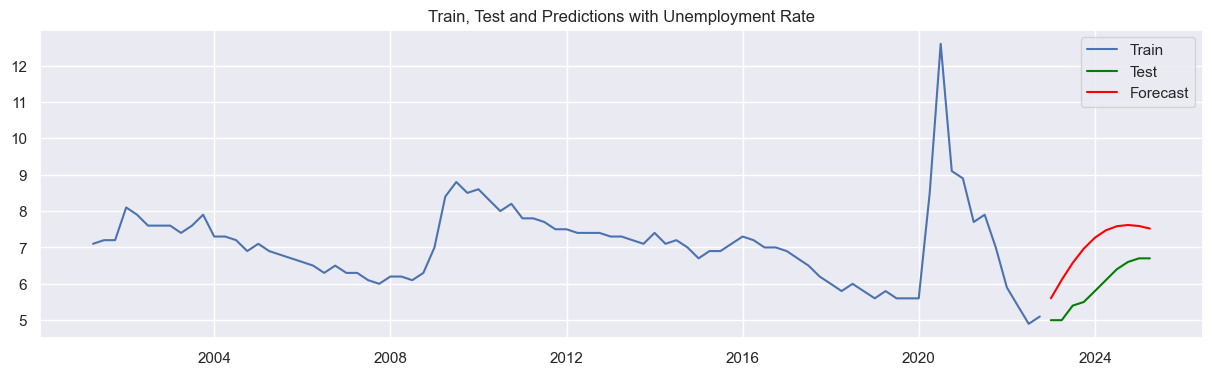

The MAE is  1.11
The RMSE is  1.14
The MAPE is  18.97%


In [169]:
model_assessment(train['u-rate'], test['u-rate'], urate_predictions_arima, 'Unemployment Rate')

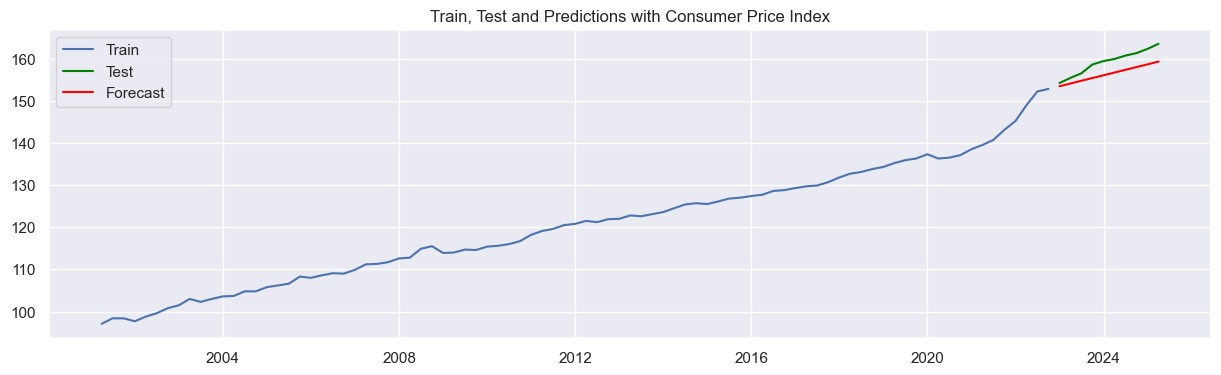

The MAE is  2.82
The RMSE is  3.02
The MAPE is  1.76%


In [170]:
model_assessment(train['cpi'], test['cpi'], cpi_predictions_arima, 'Consumer Price Index')

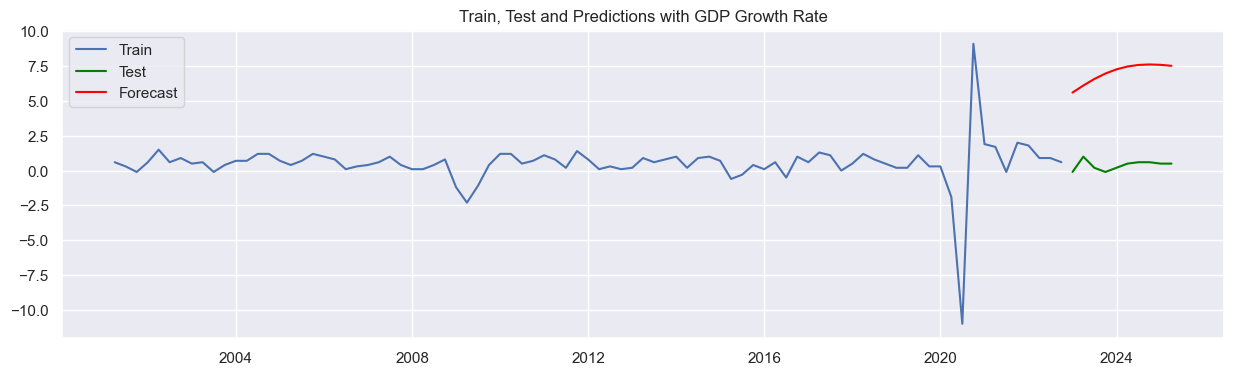

The MAE is  6.64
The RMSE is  6.67
The MAPE is  2654.77%


In [171]:
model_assessment(train['gdp_growth'], test['gdp_growth'], urate_predictions_arima, 'GDP Growth Rate')

#### Observation
- **Unemployment Rate** : The Holt-Winters Model outperforms the ARIMA model in forecasting the unemployment rate evidenced by lower MAE, RMSE and MAPE values. 

- **CPI** : After differencing the CPI series to achieve stationarity, the ARIMA model produced more accurate forecasts. Its strength in handling non-stationary data through differencing made it more suitable for CPI forecasting.

- **GDP Growth Rate**: Neither the Holt-Winters nor the ARIMA model performed well in modelling the GDP growth rate, likely because the data exhibits characteristics of white noise. 

However, despite some relative advantages, neither model performs sufficiently well in forecasting any of the three variables overall.

## Vector Autoregression Model

In [172]:
# Importing Statmodels for VAR

from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests

from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [173]:
df_main

,u-rate,cpi,gdp_growth,cpi_diff
date,,,,
2001-03-31,7.1,97.1,0.6,NaN
2001-06-30,7.2,98.4,0.3,1.3
2001-09-30,7.2,98.4,-0.1,0.0
2001-12-31,8.1,97.7,0.6,-0.7
2002-03-31,7.9,98.8,1.5,1.1
...,...,...,...,...
2024-03-31,6.1,159.9,0.5,0.5
2024-06-30,6.4,160.7,0.6,0.8
2024-09-30,6.6,161.3,0.6,0.6


In [174]:
df_main.drop('cpi_diff', axis = 1, inplace=True)

### Testing for Causality (Granger Causality Test)

In [175]:
## Granger Causality Test

maxlag = 12

test_type = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test_type= 'ssr_chi2test', verbose= False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test_type][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [176]:
grangers_causation_matrix(df_main, variables = df_main.columns)

,u-rate_x,cpi_x,gdp_growth_x
u-rate_y,1.0,0.0006,0.0
cpi_y,0.0,1.0000,0.0
gdp_growth_y,0.0,0.0010,1.0


#### Observation

All the p-values from the Granger Causality Test are less than 0.05,  indicating statistically significant causal relationships among the three variables. 

This suggests that each variable Granger-causes the others, implying mutual interdependence within the system.

#### Selecting the Order of the VAR model

In [177]:
df_main1 = df_main.copy()

In [178]:
# Making the CPI data stationary to be used in the VAR model

df_main1['cpi_diff'] = df_main['cpi'].diff().dropna()

In [179]:
# Selecting u-rate, gdp_growth and cpi_diff for the VAR model

df_main2 = df_main1[['u-rate', 'cpi_diff', 'gdp_growth']]

In [180]:
df_main2 = df_main2.drop(df_main2.index[0]) ## to drop the first row becuase it has a null value

In [182]:
# Using the VAR model on the actual dataset to select the number of lags

model = VAR(df_main2)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -2.1263616567428327
BIC :  -1.8037666809617117
FPE :  0.11928827875926976
HQIC:  -1.9960090838795845 

Lag Order = 2
AIC :  -2.3804848545780124
BIC :  -1.812301977687905
FPE :  0.092582404585897
HQIC:  -2.150980558662619 

Lag Order = 3
AIC :  -2.4449973378496477
BIC :  -1.628029759413114
FPE :  0.086943787758225
HQIC:  -2.1151291994882486 

Lag Order = 4
AIC :  -2.4914923444031247
BIC :  -1.422473273697553
FPE :  0.08326050779822446
HQIC:  -2.060027189620671 

Lag Order = 5
AIC :  -2.3451588082921297
BIC :  -1.0207493982612643
FPE :  0.09689942437937404
HQIC:  -1.8108420997573749 

Lag Order = 6
AIC :  -2.217401066838871
BIC :  -0.634188275629703
FPE :  0.11101791237490936
HQIC:  -1.5789566063326712 

Lag Order = 7
AIC :  -2.0729892559538903
BIC :  -0.22748363345589917
FPE :  0.12981790027861062
HQIC:  -1.3291189005034751 

Lag Order = 8
AIC :  -2.202318269063897
BIC :  -0.09095166581542502
FPE :  0.11600703459583708
HQIC:  -1.3517016634771455 

Lag Order = 9
AIC 

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [117]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,0.6006,0.6874,1.823,0.6355
1,-2.053,-1.706,0.1283,-1.914
2,-2.412,-1.804*,0.08978,-2.167*
3,-2.440*,-1.572,0.08742*,-2.091
4,-2.383,-1.255,0.09295,-1.930
5,-2.299,-0.9101,0.1018,-1.741
6,-2.178,-0.5288,0.1160,-1.515
7,-2.129,-0.2188,0.1235,-1.361
8,-2.245,-0.07454,0.1120,-1.372
9,-2.293,0.1379,0.1093,-1.316


#### Observation
Based on both the model output and the model.select_order(maxlags) method, we select 4 lags. This decision is guided by the Akaike Information Criterion (AIC), which is minimized at this lag length.

### Train and Test for the Var Model

In [183]:
# Training and Test Split

train_2, test_2 = df_main2.iloc[:-10, :], df_main2.iloc[-10:, :]

### Testing the Var Model of Selected Order(p)

In [185]:
model_train = VAR(train_2)

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [186]:
model_train_fitted = model_train.fit(4)
model_train_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 19, Jun, 2025
Time:                     03:04:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.18923
Nobs:                     82.0000    HQIC:                  -1.87432
Log likelihood:          -214.370    FPE:                  0.0977058
AIC:                     -2.33389    Det(Omega_mle):       0.0628335
--------------------------------------------------------------------
Results for equation u-rate
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 2.104774         0.648503            3.246           0.001
L1.u-rate             1.781988         0.230355            7.736           0.000
L1.cpi_diff          -0.245599         0.107247           -

### Checking for Serial Correlation of Residuals using Durbin Watson Statistic

In [121]:
# Importing library for Durbin Watson test
from statsmodels.stats.stattools import durbin_watson

In [189]:
# Performing a Durbin-Watson test on the train dataset
out = durbin_watson(model_train_fitted.resid)

for col, val in zip(train_2.columns, out):
    print(col, ':', round(val, 2))

u-rate : 2.02
cpi_diff : 2.02
gdp_growth : 2.07


#### Observation

The Durbin-Watson statistics are close to 2 for all three variables in the train dataset, indicating no significant serial correlation in the residuals.

In [190]:
# Performing a Durbin-Watson test on the original dataset

model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 19, Jun, 2025
Time:                     03:12:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.42247
Nobs:                     92.0000    HQIC:                  -2.06003
Log likelihood:          -238.018    FPE:                  0.0832605
AIC:                     -2.49149    Det(Omega_mle):       0.0560060
--------------------------------------------------------------------
Results for equation u-rate
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 1.982067         0.589208            3.364           0.001
L1.u-rate             1.708506         0.212210            8.051           0.000
L1.cpi_diff          -0.226608         0.095775           -

In [191]:
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_main2.columns, out):
    print(col, ':', round(val, 2))

u-rate : 2.0
cpi_diff : 2.02
gdp_growth : 1.98


#### Observation

The Durbin-Watson statistics are close to 2 for all three variables in the original dataset, indicating no significant serial correlation in the residuals.

### Testing the Model

In [198]:
# Get the lag order from the fitted model
lag_order = model_train_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_train_input = train_2.values[-lag_order:]
forecast_train_input

4


array([[5.9, 2.1, 1.8],
       [5.4, 3.7, 0.9],
       [4.9, 3.3, 0.9],
       [5.1, 0.6, 0.6]])

In [199]:
# Forecast

nobs = len(test_2)
fc = model_fitted.forecast(y=forecast_train_input, steps=nobs)
train_2_forecast = pd.DataFrame(fc, index=test_2.index, columns=train_2.columns+ '_1d' )
train_2_forecast

,u-rate_1d,cpi_diff_1d,gdp_growth_1d
date,,,
2022-12-31,5.589232,1.516378,-0.654845
2023-03-31,5.464744,1.070473,0.753478
2023-06-30,5.917304,0.663450,-0.257803
2023-09-30,6.212528,0.739383,0.091080
2023-12-31,6.583055,0.452048,-0.172209
2024-03-31,6.804697,0.544002,0.153180
2024-06-30,6.982974,0.513697,0.285392
2024-09-30,7.123822,0.504343,0.228762
2024-12-31,7.178948,0.558612,0.433787


In [200]:
train_2

,u-rate,cpi_diff,gdp_growth
date,,,
2001-06-30,7.2,1.3,0.3
2001-09-30,7.2,0.0,-0.1
2001-12-31,8.1,-0.7,0.6
2002-03-31,7.9,1.1,1.5
2002-06-30,7.6,0.8,0.6
...,...,...,...
2021-09-30,7.0,2.4,2.0
2021-12-31,5.9,2.1,1.8
2022-03-31,5.4,3.7,0.9


#### Dedifferencing the CPI forecast
The CPI data was differenced because it was non-stationary

In [201]:
last_cpi = train['cpi'].iloc[-1]

In [202]:
# Suppose your forecasted differences are in train_2_forecast['cpi_diff_1d']
dediff_cpi = last_cpi + train_2_forecast['cpi_diff_1d'].cumsum()

In [203]:
dediff_cpi

date
2022-12-31    154.316378
2023-03-31    155.386851
2023-06-30    156.050301
2023-09-30    156.789684
2023-12-31    157.241732
2024-03-31    157.785734
2024-06-30    158.299431
2024-09-30    158.803774
2024-12-31    159.362386
2025-03-31    159.972140
Name: cpi_diff_1d, dtype: float64

In [204]:
# Adding the dedifferenced CPI forecast to the original forcast. 
train_2_forecast_new = pd.merge(train_2_forecast, 
                                dediff_cpi, on = 'date', 
                                how = 'inner')

In [205]:
# Droping the differenced CPI forecast because its not need anymore
train_2_forecast_new.drop(['cpi_diff_1d_x'], 
                          axis=1, 
                          inplace= True)

In [ ]:
# Renaming the columns of the forecast
train_2_forecast_new.rename(columns={'u-rate_1d': 'u-rate_forcast', 
                                     'gdp_growth_1d': 'gdp_growth_forecast', 
                                     'cpi_diff_1d_y': 'cpi_forecast'}, 
                                     inplace= True)

In [208]:
train_2_forecast_new

,u-rate_forcast,gdp_growth_forecast,cpi_forecast
date,,,
2022-12-31,5.589232,-0.654845,154.316378
2023-03-31,5.464744,0.753478,155.386851
2023-06-30,5.917304,-0.257803,156.050301
2023-09-30,6.212528,0.091080,156.789684
2023-12-31,6.583055,-0.172209,157.241732
2024-03-31,6.804697,0.153180,157.785734
2024-06-30,6.982974,0.285392,158.299431
2024-09-30,7.123822,0.228762,158.803774
2024-12-31,7.178948,0.433787,159.362386


In [210]:
test

,u-rate,cpi,gdp_growth
date,,,
2022-12-31,5.0,154.2,-0.1
2023-03-31,5.0,155.4,1.0
2023-06-30,5.4,156.5,0.2
2023-09-30,5.5,158.6,-0.1
2023-12-31,5.8,159.4,0.2
2024-03-31,6.1,159.9,0.5
2024-06-30,6.4,160.7,0.6
2024-09-30,6.6,161.3,0.6
2024-12-31,6.7,162.3,0.5


### Plotting the Forecast Values with the Test data

In [211]:
# Creating a Function to show a plot of the test and forecast for each variable
def model_graph(forecast, test, chart_title):
    plt.figure(figsize= (15,4))
    plt.plot(test, label = 'Test', color = 'green')
    plt.plot(forecast, label = 'Forecast', color = 'red')
    plt.title(f'Test and Predictions with {chart_title}')
    plt.legend()
    plt.show()

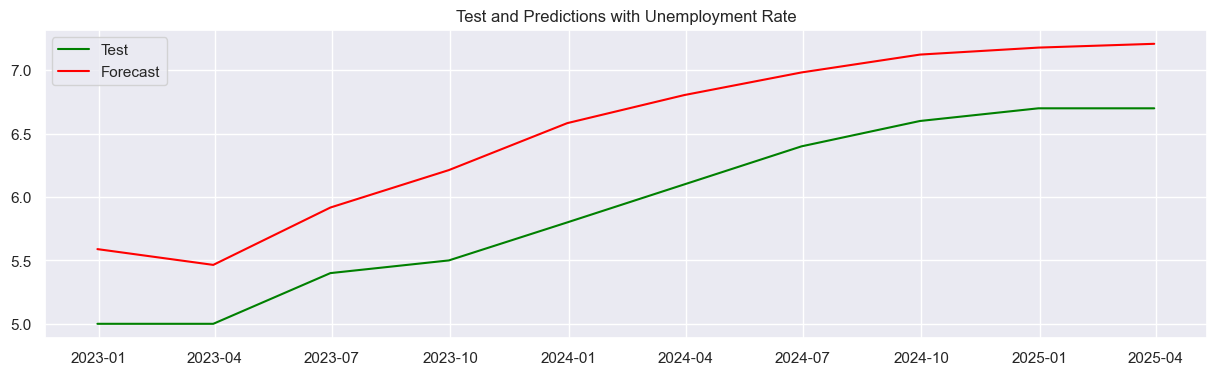

In [ ]:
# Unemployment Rate Plot
model_graph(train_2_forecast_new['u-rate_forcast'], test['u-rate'], 'Unemployment Rate')

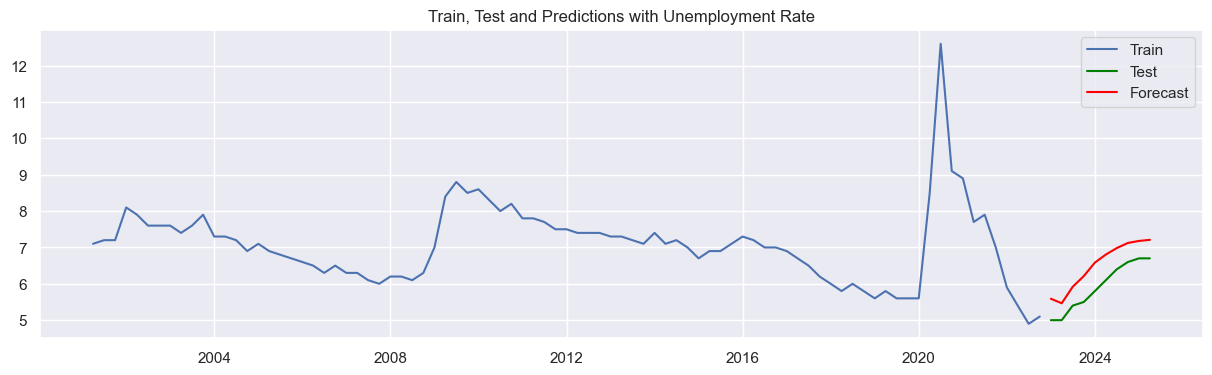

The MAE is  0.59
The RMSE is  0.60
The MAPE is  10.05%


In [213]:
# Unemployment Rate Plot with Model Assessment 
model_assessment(train['u-rate'], test['u-rate'], train_2_forecast_new['u-rate_forcast'], 'Unemployment Rate')

#### Observation 

The VAR model outperforms the ARIMA model in forecasting the unemployment rate, suggesting that incorporating the relationships between unemployment and the other variables improves predictive accuracy.

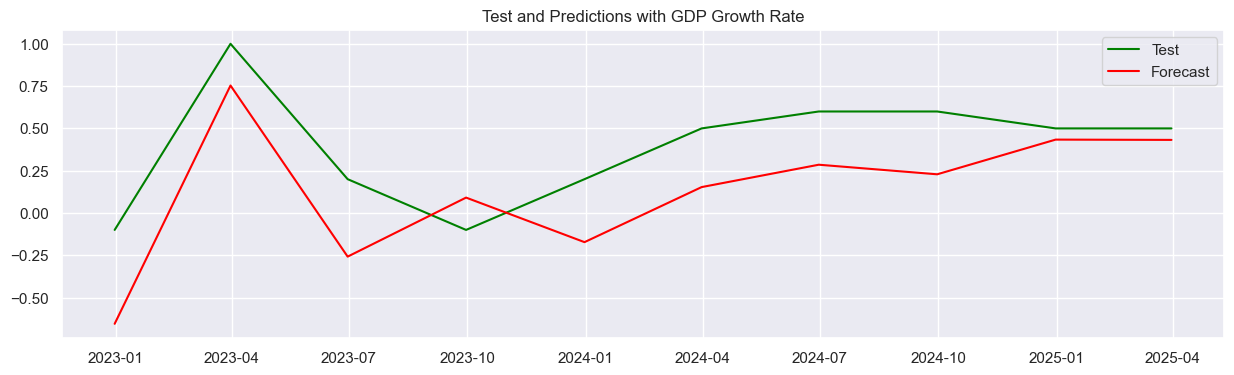

In [215]:
# GDP growth rate plot

model_graph(train_2_forecast_new['gdp_growth_forecast'], test['gdp_growth'], 'GDP Growth Rate')

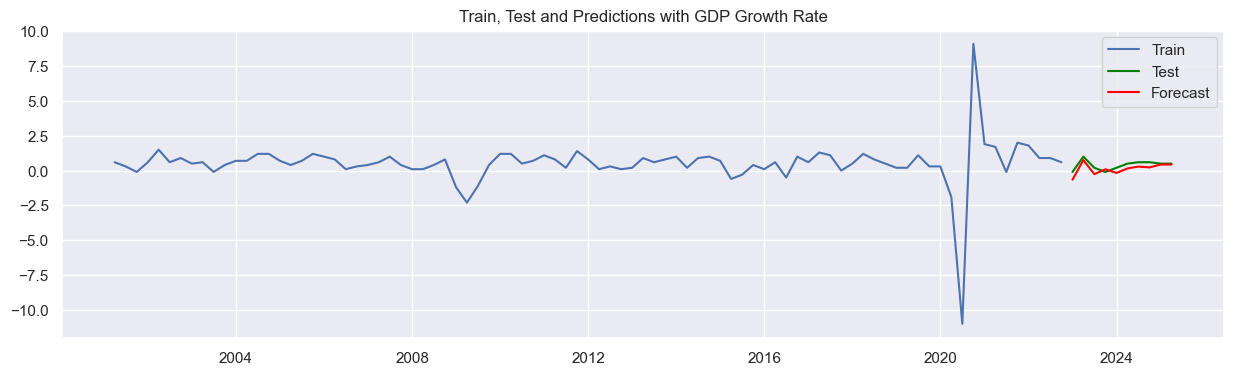

The MAE is  0.30
The RMSE is  0.33
The MAPE is  139.61%


In [216]:
# GDP Growth rate plot with model assessment 
model_assessment(train['gdp_growth'], test['gdp_growth'], train_2_forecast_new['gdp_growth_forecast'], 'GDP Growth Rate')

#### Observation 

The VAR model performs better than the ARIMA model in forecasting GDP growth; however, it still struggles to provide accurate predictions, likely due to the data exhibiting characteristics of white noise.

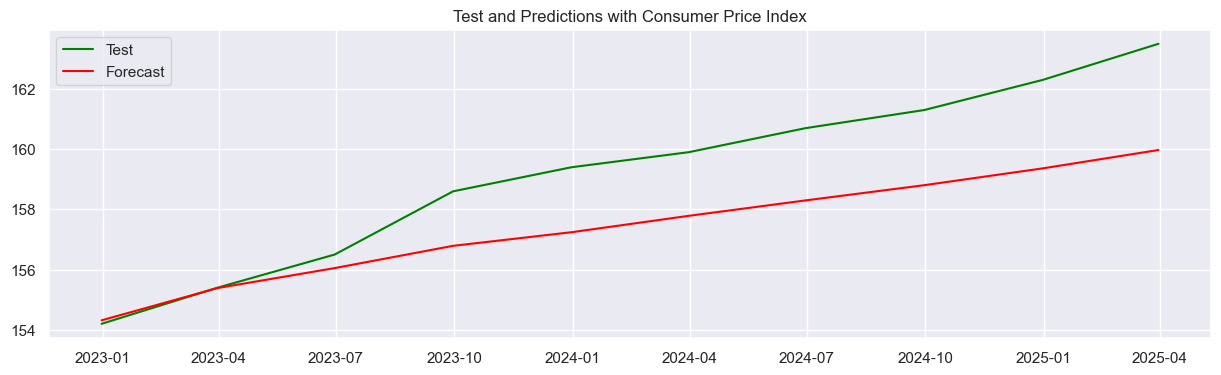

In [142]:
model_graph(train_2_forecast_new['cpi_forecast'], test['cpi'], 'Consumer Price Index')

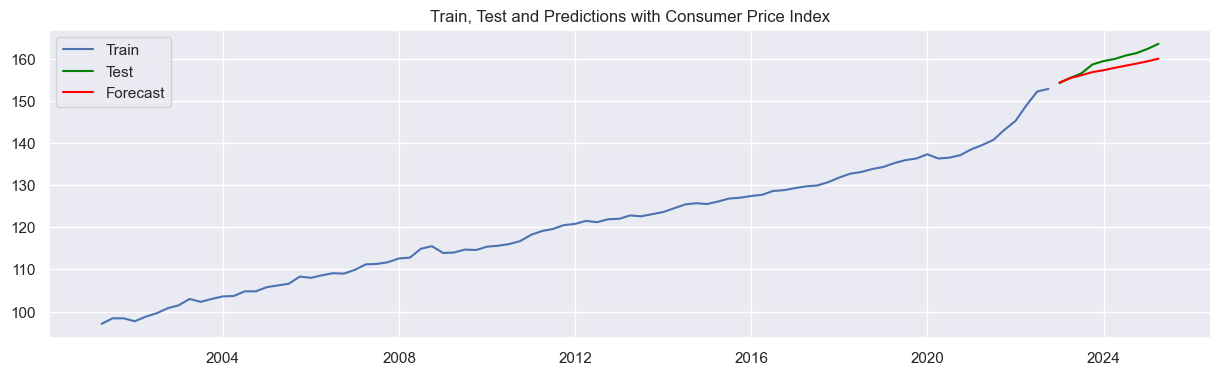

The MAE is  1.80
The RMSE is  2.14
The MAPE is  1.12%


In [143]:
model_assessment(train['cpi'], test['cpi'], train_2_forecast_new['cpi_forecast'], 'Consumer Price Index')

#### Observation 
VAR's differenced CPI forecasts performed sightly better than the ARIMA model. 

## Final Forecast With the Original Data

In [222]:
model = VAR(df_main2)

model_fitted = model.fit(4)
model_fitted.summary()

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 19, Jun, 2025
Time:                     04:10:41
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.42247
Nobs:                     92.0000    HQIC:                  -2.06003
Log likelihood:          -238.018    FPE:                  0.0832605
AIC:                     -2.49149    Det(Omega_mle):       0.0560060
--------------------------------------------------------------------
Results for equation u-rate
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 1.982067         0.589208            3.364           0.001
L1.u-rate             1.708506         0.212210            8.051           0.000
L1.cpi_diff          -0.226608         0.095775           -

In [223]:
# Get the lag order from the fitted model
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_main2.values[-lag_order:]
forecast_input

4


array([[6.4, 0.8, 0.6],
       [6.6, 0.6, 0.6],
       [6.7, 1. , 0.5],
       [6.7, 1.2, 0.5]])

### Forecast

In [233]:
# Get the last date in df_main2
last_date = df_main2.index[-1]

# Create a DatetimeIndex for the next 3 quarters
future_dates = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), periods=3, freq='Q')

# Forecast the next 3 quarters
nobs = 3
fc = model_fitted.forecast(y=forecast_input, steps=nobs)

# Create the forecast DataFrame with the new future dates as index
df_forecast = pd.DataFrame(fc, index=future_dates, columns=[col + '_fc' for col in df_main2.columns])
df_forecast.reset_index(inplace=True)
df_forecast.rename(columns={'index': 'date'}, inplace=True)
df_forecast.set_index('date', inplace= True)

df_forecast

,u-rate_fc,cpi_diff_fc,gdp_growth_fc
date,,,
2025-06-30,6.699832,0.878942,0.602257
2025-09-30,6.754692,0.903899,0.425322
2025-12-31,6.729078,0.860713,0.530926


In [238]:
# Dedifferencing the CPI forecast

# Get the last CPI value from df_main, matching the last date in df_main2
last_cpi = df_main.loc[df_main2.index[-1], 'cpi']

dediff_cpi2 = last_cpi + df_forecast['cpi_diff_fc'].cumsum()


In [239]:
dediff_cpi2

date
2025-06-30    164.378942
2025-09-30    165.282841
2025-12-31    166.143554
Name: cpi_diff_fc, dtype: float64

In [240]:
# Adding the dedifferenced CPI forecast to the original forcast. 
df_forecast_new = pd.merge(df_forecast, 
                                dediff_cpi2, on = 'date', 
                                how = 'inner')


In [242]:
# Droping the differenced CPI forecast because its not need anymore
df_forecast_new.drop(['cpi_diff_fc_x'], 
                          axis=1, 
                          inplace= True)

In [244]:
# Renaming the columns of the forecast
df_forecast_new.rename(columns={'u-rate_fc': 'u-rate_forcast', 
                                     'gdp_growth_fc': 'gdp_growth_forecast', 
                                     'cpi_diff_fc_y': 'cpi_forecast'}, 
                                     inplace= True)

In [246]:
df_forecast_new

,u-rate_forcast,gdp_growth_forecast,cpi_forecast
date,,,
2025-06-30,6.699832,0.602257,164.378942
2025-09-30,6.754692,0.425322,165.282841
2025-12-31,6.729078,0.530926,166.143554


#### Observation
- Based on our forecast, the unemployment rate is expected to be 6.7%, the GDP growth rate 0.6%, and the CPI 164 by the end of the second quarter.

- Also, the unemployment rate is expected to be 6.72%, the GDP growth rate 0.53%, and the CPI 166 by the end of the forth quarter.

## Conclusion and Final Remarks

In this project, I conducted a comprehensive time series analysis of Canada’s key economic indicators: unemployment rate, consumer price index (CPI), and GDP growth rate. I explored and compared several forecasting models, including Exponential Smoothing (Holt-Winters), ARIMA, and Vector Autoregression (VAR).


### Key findings:

**Unemployment Rate**: The ARIMA and VAR models provided more accurate forecasts than Exponential Smoothing, with VAR offering additional insights by capturing interdependencies among variables.

**CPI**: ARIMA performed well after differencing to achieve stationarity, while VAR further improved forecasts by leveraging relationships with other economic indicators.

**GDP Growth Rate**: Both ARIMA and VAR struggled to forecast GDP growth rate effectively, likely due to its white noise characteristics and lack of strong autocorrelation.

#### Final Remarks:
This analysis highlights the importance of model selection based on the characteristics of each time series. While univariate models like ARIMA are effective for stationary series, multivariate models such as VAR can enhance forecasting when variables are interrelated. However, no model can accurately predict series that are essentially random.

